# __Credit Card Fraudulent Transactions Classification__

## __Plan of Action__ - 
structure and Plan the Methodology to go about solving this problem - 

- Understading the Data , Exploring it's length , breadth and height ( How BIG , How DIVERSE , How GRANULAR )   Called : __EDA__

- __Visualisation of Data for Finding any specific Pattern or Flaw in the Data that can effect the Model__

- Finding the Complexities and Roadblocks for Modelling this particular Use Case

- Solving Use Case Specific Problems and consequently Handling Errors , Outliers and Missing Values in the Data

- Processing and Cleaning the Data to make it fit for Modelling and feeding to a Machine Learning Model

- Splitting the Dataset into Training and Testing Datasets

- Training the data on Multiple Classification Models

- Evaluating Models based on various Metrics and Understanding which metric is the most appropriate for Model Evaluation

- further ways to improve the model , feedback mechanism for the model and saving the model for future use

## _IMPORT NECESSARY MODULES AND PACKAGES!_

In [78]:
# LIBRARIES IMPORT

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import matplotlib

# For versioning

#Print Versions for sharing Projects

print(f"Pandas Version : Pandas {pd.__version__}")
print(f"Numpy Version : Numpy {np.__version__}")
print(f"Matplotlib Version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn Version : Seaborn {sns.__version__}")

# Magic Functions for In-Notebook Display

%matplotlib inline

Pandas Version : Pandas 1.0.5
Numpy Version : Numpy 1.19.1
Matplotlib Version : Matplotlib 3.3.0
Seaborn Version : Seaborn 0.10.1


# Importing Dataset

In [79]:
df = pd.read_csv('creditcard.csv')

In [80]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [81]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [82]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [83]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [84]:
pd.set_option('display.max_rows',1000)

In [85]:
df.head(1000)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [86]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [87]:
df['Amount'].max()

25691.16

In [88]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [89]:
df[['Time','Class','Amount']].describe()

,Time,Class,Amount
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.001727,88.349619
std,47488.145955,0.041527,250.120109
min,0.000000,0.000000,0.000000
25%,54201.500000,0.000000,5.600000
50%,84692.000000,0.000000,22.000000
75%,139320.500000,0.000000,77.165000
max,172792.000000,1.000000,25691.160000


# DATA QUALITY MATRIX #

In [90]:
#Null Values

In [91]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [92]:
#Duplicate Values

In [93]:
df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

In [94]:
# Removing the Duplicate Values
df.drop_duplicates(inplace = True)
print(len(df)) 

283726


In [95]:
df.reset_index(inplace = True , drop = True)

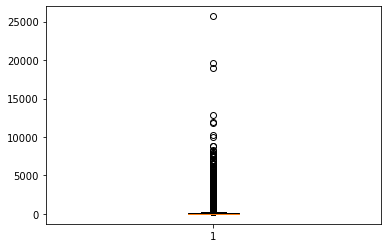

In [96]:
plt.boxplot(df['Amount'])
plt.show()

# Outliers Detection#

In [97]:
def indicies_of_outliers(x):
    q1, q3 = np.percentile(x, [25,75])
    iqr = q3-q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((x>upper_bound) | (x<lower_bound))

In [98]:
indicies_of_outliers(df['Amount'])


(array([     2,     20,     49, ..., 283672, 283676, 283725], dtype=int64),)

In [99]:
q1,q3 = np.percentile(df['Amount'], [25,75])

In [100]:
q1

5.6

In [101]:
q3

77.51

In [102]:
iqr = q3-q1
iqr

71.91000000000001

In [103]:
lower_bound = q1 - (iqr * 1.5)
lower_bound

-102.26500000000001

In [104]:
upper_bound = q3 + (iqr * 1.5)
upper_bound

185.375

In [105]:
df[df['Amount']<0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [106]:
len(indicies_of_outliers(df['Amount'])[0])/len(df)

0.11167464384652799

In [107]:
len(df)

283726

In [108]:
len(list(indicies_of_outliers(df['Amount'])[0]))

31685

In [109]:
df[df.index.isin(list(indicies_of_outliers(df['Amount'])[0]))]['Class'].value_counts(normalize = True)

0    0.997254
1    0.002746
Name: Class, dtype: float64

In [110]:
df['Class'].value_counts(normalize = True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

<AxesSubplot:xlabel='Amount'>

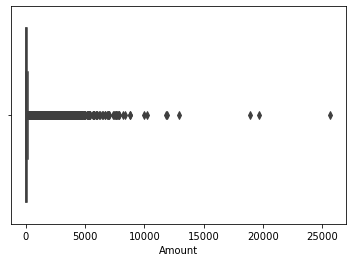

In [111]:
sns.boxplot(df['Amount'] , hue = df['Class'])

<AxesSubplot:xlabel='Class', ylabel='Amount'>

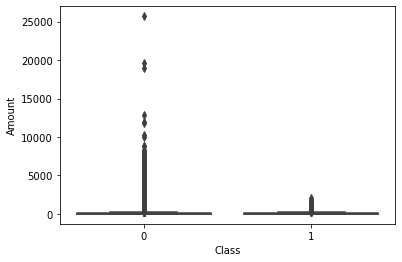

In [112]:
sns.boxplot(x = "Class", y = "Amount" , data = df)

In [113]:
def outlier_removal(max_val):
    print("Values Lost on the basis of MAX based Removal : {}".format(len(df[(df['Class']==0) &(df['Amount']>max_val)])))
    
    print("Proportion of Data Lost : {}".format(len(df[(df['Class']==0) &(df['Amount']>max_val)])/len(df)))
    
    temp_df = df[df['Amount']<max_val] # Outlier Removed DF
    print(temp_df['Class'].value_counts(normalize = True))

In [114]:
outlier_removal(df[df['Class']==1]['Amount'].max())

Values Lost on the basis of MAX based Removal : 603
Proportion of Data Lost : 0.0021252898923609397
0    0.998333
1    0.001667
Name: Class, dtype: float64


In [115]:
df[df['Class']==1]['Amount'].max()

2125.87

# _PLOTS_ #

# Amount

In [116]:
import warnings
warnings.filterwarnings('ignore')

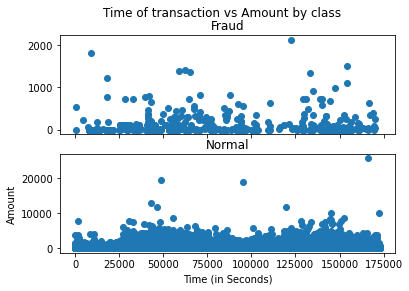

In [117]:
Fraud = df[df['Class']==1] 
Normal = df[df['Class']==0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True) 
f.suptitle('Time of transaction vs Amount by class') 
ax1.scatter(Fraud.Time, Fraud.Amount) 
ax1.set_title('Fraud') 
ax2.scatter(Normal.Time, Normal.Amount) 
ax2.set_title('Normal') 
plt.xlabel('Time (in Seconds)') 
plt.ylabel('Amount') 
plt.show()

[]

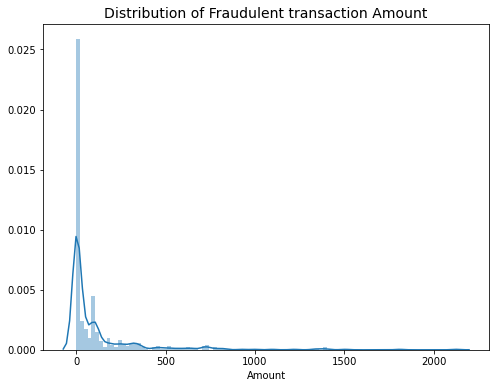

In [118]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Fraudulent transaction Amount', fontsize = 14)
sns.distplot(df[df['Class']==1]['Amount'], bins=100)
plt.plot()

[]

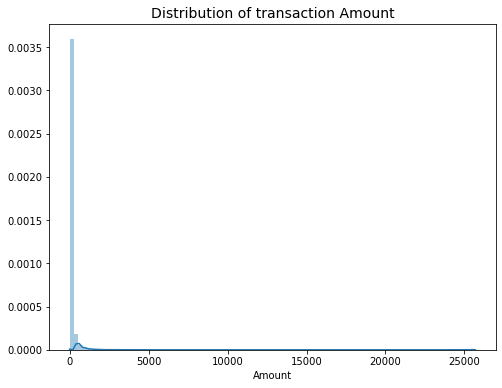

In [119]:
plt.figure(figsize=(8,6))
plt.title('Distribution of transaction Amount', fontsize = 14)
sns.distplot(df[df['Class']==0]['Amount'], bins=100)
plt.plot()

In [120]:
# Observation : Data Set with respect to Amount is highly skewed
# Solution : Scaling the Amount Column

# Distribution of time #

[]

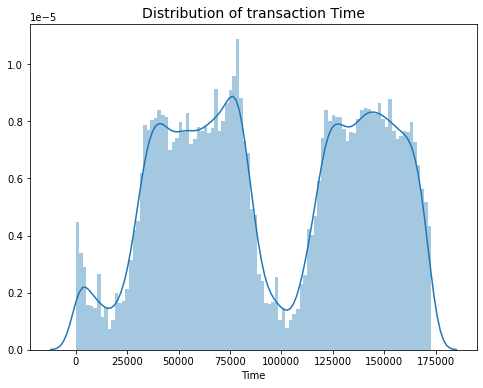

In [121]:
plt.figure(figsize=(8,6))
plt.title('Distribution of transaction Time', fontsize = 14)
sns.distplot(df['Time'], bins=100)
plt.plot()

[]

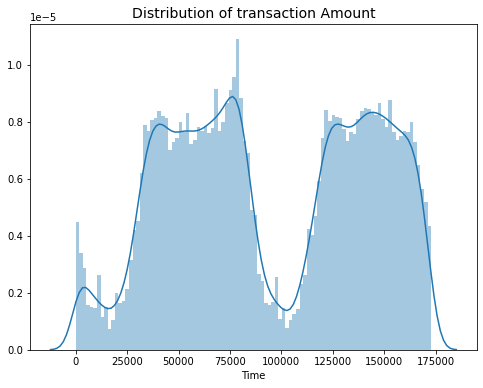

In [122]:
plt.figure(figsize=(8,6))
plt.title('Distribution of transaction Amount', fontsize = 14)
sns.distplot(df[df['Class']==0]['Time'], bins=100)
plt.plot()

[]

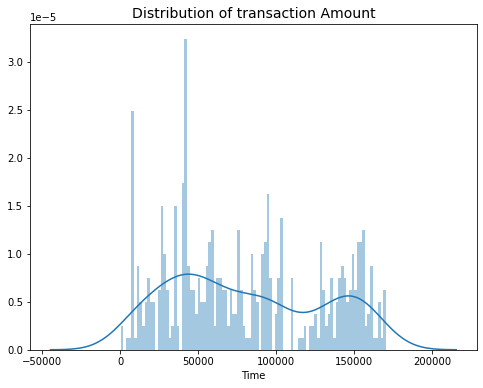

In [123]:
plt.figure(figsize=(8,6))
plt.title('Distribution of transaction Amount', fontsize = 14)
sns.distplot(df[df['Class']==1]['Time'], bins=100)
plt.plot()

[]

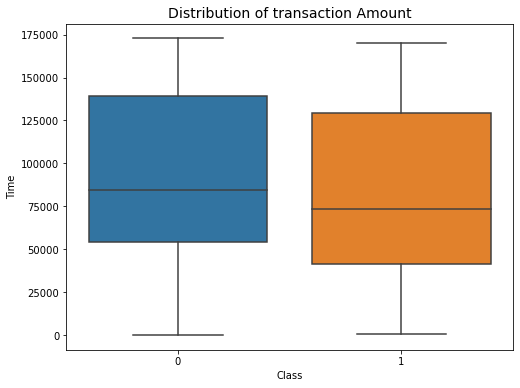

In [124]:
plt.figure(figsize=(8,6))
plt.title('Distribution of transaction Amount', fontsize = 14)
sns.boxplot(x ='Class', y = 'Time', data=df)
plt.plot()

# Class #

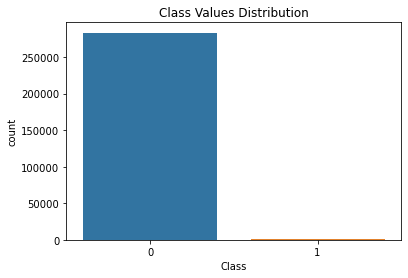

In [125]:
plt.figsize = (20,20)
sns.countplot(df['Class']) # Highly Skewed , Imbalanced Data
plt.title('Class Values Distribution')
plt.show()

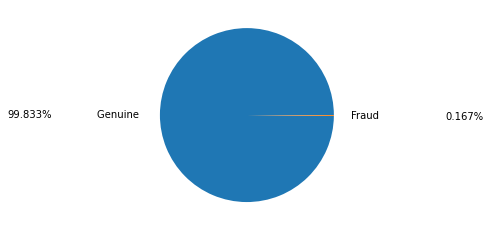

In [126]:
labels = ['Genuine ','Fraud ']
plt.pie(df['Class'].value_counts(), labels=labels, autopct='%0.3f%%' , pctdistance=2.5, labeldistance=1.2)
plt.show()

In [127]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [128]:
per_of_class_1 = df['Class'].value_counts()[1] / len(df)
print("Skew Percentage , Less Dominant Class : {}".format(per_of_class_1))

Skew Percentage , Less Dominant Class : 0.001667101358352777


# After Observation we now fix the problems that we observed , also help in better visualisation 

#### First we create we create , modify and handle columns and then visualise again 

### 1. Handling the __*TIME*__ column
### 2. Scaling and Binning the __*AMOUNT*__ column
### 3. Solving the Imbalance of the __*CLASS*__ columns

#### Handling the __*TIME*__ column

In [129]:
### Processing the Time Column

df['hour'] = df['Time']/(60*60)%24   # 2 days of data

import math
df['hour'] = df['hour'].apply(lambda x : math.floor(x))

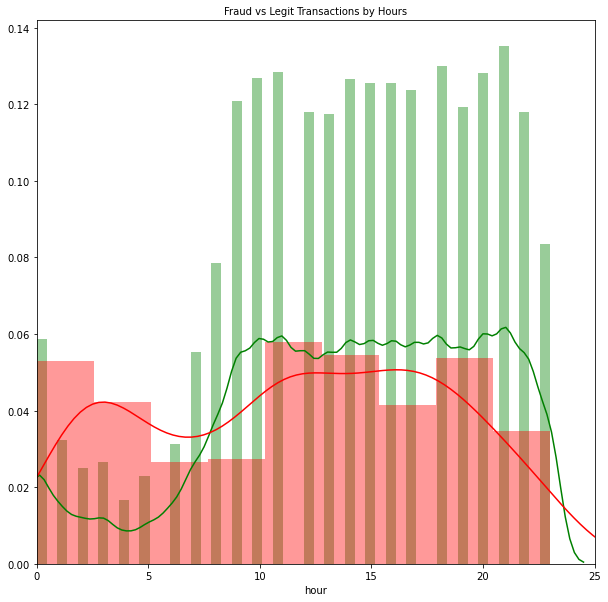

In [130]:
# Let's see if we find any particular pattern between time ( in hours ) and Fraud vs Legit Transactions

# matplotlib.pyplot as plt

plt.figure(figsize=(10,10)) # tuple of the figure size
# seaborn as sns

sns.distplot(df[df['Class'] == 0]["hour"], color='g') # Genuine - green

sns.distplot(df[df['Class'] == 1]["hour"], color='r') # Fraudulent - Red

plt.title('Fraud vs Legit Transactions by Hours', fontsize=10)
plt.xlim([0,25])
plt.show()

####  Log Tranformation in the __*AMOUNT*__ column

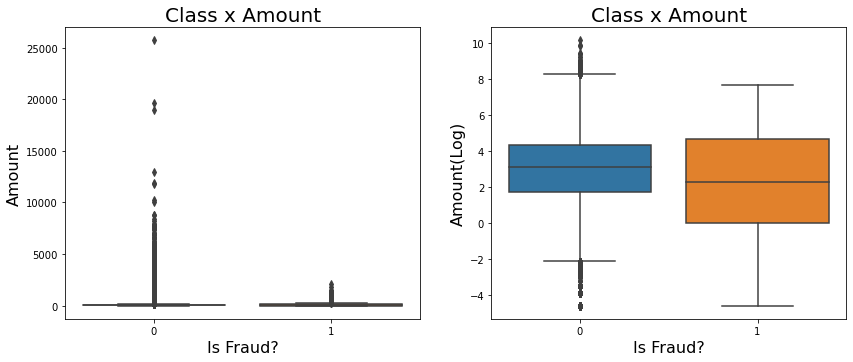

In [132]:
#Feature engineering to a better visualization of the values
df['amount_log'] = np.log(df['Amount'] + 0.01)

plt.figure(figsize=(14,6))
# Let's explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",
                 data=df)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y="amount_log", data=df)
ax1.set_title("Class x Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

In [133]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour,amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,4.248495


# Outlier Treatment

In [ ]:
df = df['Amount']<3000

In [ ]:
len(df)

In [ ]:
df.to_csv('elementary_data_processed.csv' , index = False)